# Exercise #2 - Gymnasium

In this exercise we will look at the [Gymnasium](https://gymnasium.farama.org/) library and create a few helper functions that we can use in the next exercises.

Let's first import the necessary libraries. 

In [1]:
import numpy as np
import gymnasium
from tqdm import trange

You have already seen a demonstration how the environment can be used. If you need a refresher, then you can open `Demo #3a - Taxi.ipynb`.

Let's create a new environment object.

In [2]:
env = gymnasium.make('Taxi-v3')

## Run one episode

First, we start with running a single episode. This means resetting the environment to its initial state and then using a policy to take steps in the environment until the episode is finished. We want to store all states, actions and rewards of the entire episode, so we can use that in later exercises to train our agents. You have to fill in the code below.

### Initialization

First reset the given environment using its `reset` function. It returns a tuple of two items of which you can discard the second. Discarding can be done using the `_` variable. For instance `a, _ = (10, 20)` will assign `10` to `a` and discard the `20`. The first item it returns is the initial observation, i.e. how the environment displays its current state. Assign that to `observation` variable so we can use it in the loop.

#### Loop

We then enter the main loop, where we first have to get an action for the current observation using the given policy function. The `policy` parameter should reference a function, making it callable. This policy functiun should accept an observation and return an action (integer). Call the `policy` function with the current `observation` as input. We also want to store all observations received and actions taken, so use the `append` function of lists to add the `observation` to the `observations` list and the `action` to the `actions` list.

Use the action to take a step in the environment using the `step` function of `env`. You only have to provide `action` as input. It will return a tuple of **5** items, of which the last can be discarded. The first 4 items we want to store in `next_observation`, `reward`, `done`, and `trunc`. Then add `reward` to the `rewards` list. The `done` and `trunc` variables are used later in the code and do not have to be added to a list.

We also want to track the current episode length and the sum of the rewards received (also known as the return $G_T$). These values can be simply computed by calling the global function `len` with the `actions` list as input, and the `sum` function with the `rewards` list as input. Store the length in the `length` variable and the return in the `score` variable. We can't use `return`, because is a reserved keyword.

Last step in the loop is the to assign `next_observation` to `observation`, so the next iteration uses the right input for the policy.

Every environment step is also notified to the client using a callback function `on_step`, but that is already implemented for you. This will come in handy in later exercises.

### Wrap-up

After the loop has finished, there are two things that need to be done. First, compute the final length and score the same way as we did before. Then we have to convert the lists of gathered data to NumPy arrays. This makes them easier and faster to process later on. This can be simply done by calling the [`np.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function with a list as input. You also have to specify the datatype of the items in the arrays using the `dtype` parameter. For the observations and rewards you should use the `np.float32` datatype, but for the actions you should use the `np.int32` datatype.

In [3]:
def run_episode(env : gymnasium.Env, policy, on_step = None):
    observations = []
    actions = []
    rewards = []

    #### START CODE ####
    # Reset environment and assign observation
    observation, _ = env.reset()
    #### END CODE ####

    done = False
    while not done:
        #### START CODE ####
        # Get action from policy for current observation
        action = policy(observations)
        # Store observation and action
        observations.append(observation)
        actions.append(action)

        # Take step in environment and assign next_observation, reward, done, and trunc (discard last item)
        next_observation, reward, done, trunc, _ = env.step(action)
        # Store reward
        rewards.append(reward)

        # Compute current length and return
        length = len(actions)
        score = sum(rewards)
        #### END CODE ####

        # Stop the episode if it was truncated (i.e. max steps reached)
        if trunc: done = True

        # Call a callback function to notify the result of this single step
        if on_step: on_step(observation, action, next_observation, reward, done, length, score)

        #### START CODE ####
        # Make next observation the current observation
        observation = next_observation
        #### END CODE ####

    #### START CODE ####
    # Compute total length and return
    length = len(actions)
    score = sum(rewards)

    # Convert to NumPy arrays
    observations = np.array(observations, dtype=np.float32)
    actions = np.array(actions, dtype=np.int32)
    rewards = np.array(rewards, dtype=np.float32)
    #### END CODE #### 

    return length, score, observations, actions, rewards

Before we can call this new function, we need to define a policy function. We will make a completely random policy. The Gymnasium environment object has two public properties `observation_space` and `action_space`. The latter has a nice function called `sample`, that will return a random sample from the action space. You don't have to know the type of action or the bounds, this function will do just what you need. So, call this function and return the result.

In [4]:
def random_policy(observation):
    #### START CODE ####
    action = env.action_space.sample()
    #### END CODE ####
    return action

Now let's see if it all works as intended.

Run the next cell. It should print a long list (200 lines) with rewards and scores of a random policy that plays the Taxi game.

In [5]:
def on_step(observation, action, next_observation, reward, done, length, score):
    print(f'  {reward=}, {score=}')

length, score, observations, actions, rewards = run_episode(env, random_policy, on_step)
observations.shape, actions.shape, rewards.shape

  reward=-10, score=-10
  reward=-10, score=-20
  reward=-1, score=-21
  reward=-1, score=-22
  reward=-1, score=-23
  reward=-10, score=-33
  reward=-10, score=-43
  reward=-10, score=-53
  reward=-1, score=-54
  reward=-10, score=-64
  reward=-1, score=-65
  reward=-1, score=-66
  reward=-10, score=-76
  reward=-10, score=-86
  reward=-1, score=-87
  reward=-10, score=-97
  reward=-10, score=-107
  reward=-10, score=-117
  reward=-1, score=-118
  reward=-1, score=-119
  reward=-10, score=-129
  reward=-1, score=-130
  reward=-1, score=-131
  reward=-1, score=-132
  reward=-1, score=-133
  reward=-1, score=-134
  reward=-10, score=-144
  reward=-10, score=-154
  reward=-10, score=-164
  reward=-10, score=-174
  reward=-10, score=-184
  reward=-1, score=-185
  reward=-10, score=-195
  reward=-1, score=-196
  reward=-1, score=-197
  reward=-1, score=-198
  reward=-1, score=-199
  reward=-10, score=-209
  reward=-10, score=-219
  reward=-1, score=-220
  reward=-1, score=-221
  reward=-10

((200,), (200,), (200,))

The output of the above cell should be the shape of the observarions, actions, and rewards arrays and should be equal to.

    ((201,), (200,), (200,))

## Multiple episodes

This was most of the work. We can now simply call the above function in a for loop to run multiple episodes.

The function below will run `n_episodes` and shows a progress bar. It will also compute a moving average of the episode length and score (i.e. return). After every episode the client will be notified of the result using the `on_episode_end` callback function. This is all already implemented, you only have to fill in the call to the `run_episode` function. Don't forget to pass along the `policy` and the `on_step` parameters and store the results in the correct variables.

In [6]:
def run_environment(env : gymnasium.Env, n_episodes, policy, on_step = None, on_episode_end = None):
    # Initialize moving averages
    avg_factor = 0.99
    avg_length = None
    avg_score = None

    # Show a progress bar using TQDM
    E = trange(n_episodes)
    for episode in E:
        #### START CODE ####
        # Run a single episode and assign output to correct variables
        length, score, observations, actions, rewards = run_episode(env, random_policy, on_step)
        #### END CODE ####

        # Compute an show a moving average of the length and the score
        avg_length = (avg_factor * avg_length + (1-avg_factor) * length) if avg_length else length
        avg_score = (avg_factor * avg_score + (1-avg_factor) * score) if avg_score else score
        E.set_postfix(avg_length=f'{avg_length:.1f}', avg_score=f'{avg_score:.1f}')
        
        # Call a callback function to notify the results of a single episode
        if on_episode_end: on_episode_end(episode, observations, actions, rewards, length, score)


To test this we are going to use the same functions we used before. But now with an additional `on_episode_end` function to show the result of each episode. Run the next cell to see if everything is implemented correctly.

In [7]:
def on_episode_end(episode, observations, actions, rewards, length, score):
    print(f'ep #{episode}: {length=}, {score=}')

run_environment(env, 2, random_policy, on_step, on_episode_end)

100%|██████████| 2/2 [00:00<00:00, 181.64it/s, avg_length=200.0, avg_score=-748.5]

  reward=-10, score=-10
  reward=-1, score=-11
  reward=-1, score=-12
  reward=-1, score=-13
  reward=-10, score=-23
  reward=-10, score=-33
  reward=-1, score=-34
  reward=-1, score=-35
  reward=-1, score=-36
  reward=-10, score=-46
  reward=-10, score=-56
  reward=-1, score=-57
  reward=-1, score=-58
  reward=-1, score=-59
  reward=-10, score=-69
  reward=-10, score=-79
  reward=-1, score=-80
  reward=-1, score=-81
  reward=-1, score=-82
  reward=-10, score=-92
  reward=-10, score=-102
  reward=-1, score=-103
  reward=-10, score=-113
  reward=-10, score=-123
  reward=-1, score=-124
  reward=-1, score=-125
  reward=-1, score=-126
  reward=-10, score=-136
  reward=-10, score=-146
  reward=-10, score=-156
  reward=-10, score=-166
  reward=-1, score=-167
  reward=-10, score=-177
  reward=-1, score=-178
  reward=-1, score=-179
  reward=-1, score=-180
  reward=-1, score=-181
  reward=-10, score=-191
  reward=-1, score=-192
  reward=-1, score=-193
  reward=-1, score=-194
  reward=-10, score

You should see a progress bar that is updated quickly and shows two episodes being run including an average length and score. The averages are probably length 200 and average a very negative number. You should also see the output of the `on_step` and `on_episode_end` functions. For example:

      reward=-1, score=-774
      reward=-1, score=-775
      reward=-1, score=-776
    ep #1: length=200, score=-776

If this is not the case, check your implementation.

## Evaluation

Next to running episodes and keeping track of all the data, we can also simply run a single episode and visualize the result. As demonstrated, the Gymnasium environments have the option to render the observations in a human friendly way.

We can simply reuse the function we already created in the following way, using two utility functions that initialize and update an image.

In [8]:
from utils import create_frame, update_frame

def evaluate(env: gymnasium.Env, policy):
    # Reset the environment and create an image of the current observation
    env.reset()
    frame = create_frame(env)

    # On every step update the displayed observation
    def on_step(observation, action, next_observation, reward, done, length, score):
        update_frame(frame)

    # Run a single observation
    length, score, observations, actions, rewards = run_episode(env, policy, on_step)
    
    # Print the episode stats
    print(f'Episode length: {length}, return: {score}')
    return length, score

Now run the next cell to visually see the random policy in action.

The environment is recreated here with explicitly setting the `render_mode` parameter to `rgb_array`. This makes it possible to show the output in an embedded image.

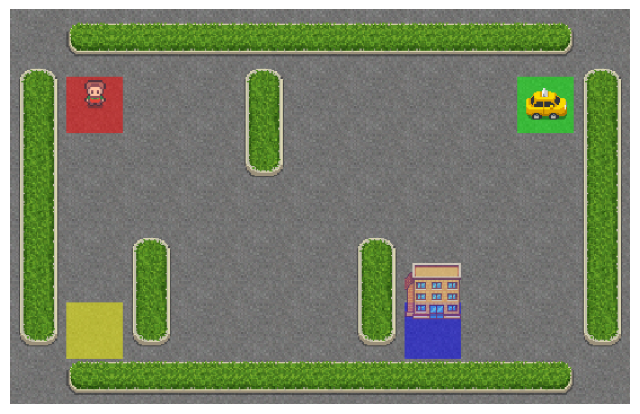

Episode length: 200, return: -731


(200, -731)

In [9]:
env = gymnasium.make('Taxi-v3', render_mode='rgb_array')
length, score = evaluate(env, random_policy)
length, score

## Conclusion

That's it. We implemented the functions that we are going to use in the next couple exercises.